In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'lib')))
from new_numba import *

# RG flow

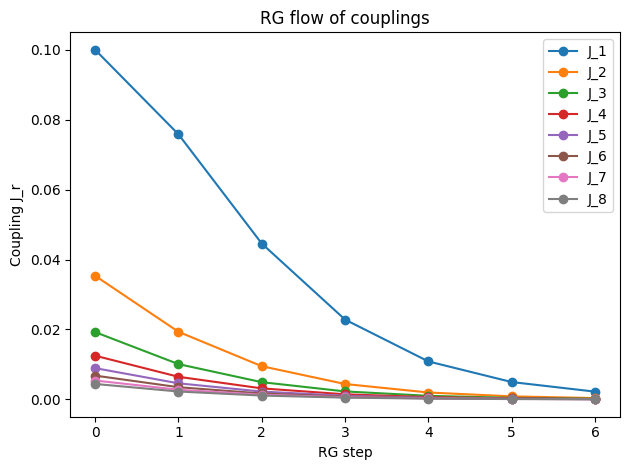


RG step 0:
 [[1.     0.8187]
 [0.8187 1.    ]]

RG step 1:
 [[1.     0.8593]
 [0.8593 1.    ]]

RG step 2:
 [[1.     0.9147]
 [0.9147 1.    ]]

RG step 3:
 [[1.     0.9554]
 [0.9554 1.    ]]

RG step 4:
 [[1.     0.9785]
 [0.9785 1.    ]]

RG step 5:
 [[1.     0.9901]
 [0.9901 1.    ]]

RG step 6:
 [[1.     0.9956]
 [0.9956 1.    ]]


In [2]:
J0 = 1/10
a = 1.5
max_dist_final = 8
n_steps = 6

J_list, T_list = generate_rg_flow(J0, a, max_dist_final, n_steps, trace_TM=True, TM_r=1)
flows = extract_flows(J_list, max_dist_final)
plot_rg_flow(flows, distances_to_plot=[1, 2, 3, 4, 5, 6, 7, 8])

[print(f"\nRG step {i}:\n", np.round(t, 4)) for i, t in enumerate(T_list)];

# Phase determination

In [11]:
J0 = 1
a = 1.5

phase, step = find_phase(
        J0, a,
        TM_r=1,
        max_dist_final=8,
        n_steps=5,
        threshold=0.1
    )
print(f"Phase at J0={J0}, a={a}: {phase} (decided at step {step})")

Phase at J0=1, a=1.5: ferromagnetic (decided at step 1)


# Critical point

In [3]:
Jc = find_Jc(
    a=1.5,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=6, max_dist_final=5,
    tol=1e-5,
    growth_threshold=1e4, decay_threshold=1e-4
)
print("Critical Jc =", Jc)
print("Critical Tc =", 1/Jc)

Critical Jc = 0.41798577338457105
Critical Tc = 2.3924259237405727


## Critical line

a = 0.7700  →  Jc = 0.001, Tc = 9.97e+02
a = 0.7824  →  Jc = 0.00802, Tc = 1.25e+02
a = 0.7948  →  Jc = 0.0151, Tc = 66.3
a = 0.8073  →  Jc = 0.0221, Tc = 45.2
a = 0.8197  →  Jc = 0.0291, Tc = 34.3
a = 0.8321  →  Jc = 0.0361, Tc = 27.7
a = 0.8445  →  Jc = 0.043, Tc = 23.2
a = 0.8570  →  Jc = 0.0499, Tc = 20.0
a = 0.8694  →  Jc = 0.0568, Tc = 17.6
a = 0.8818  →  Jc = 0.0637, Tc = 15.7
a = 0.8942  →  Jc = 0.0705, Tc = 14.2
a = 0.9067  →  Jc = 0.0773, Tc = 12.9
a = 0.9191  →  Jc = 0.0841, Tc = 11.9
a = 0.9315  →  Jc = 0.0909, Tc = 11.0
a = 0.9439  →  Jc = 0.0976, Tc = 10.2
a = 0.9564  →  Jc = 0.104, Tc = 9.58
a = 0.9688  →  Jc = 0.111, Tc = 9.0
a = 0.9812  →  Jc = 0.118, Tc = 8.49
a = 0.9936  →  Jc = 0.125, Tc = 8.03
a = 1.0061  →  Jc = 0.131, Tc = 7.62
a = 1.0185  →  Jc = 0.138, Tc = 7.25
a = 1.0309  →  Jc = 0.145, Tc = 6.91
a = 1.0433  →  Jc = 0.151, Tc = 6.6
a = 1.0558  →  Jc = 0.158, Tc = 6.32
a = 1.0682  →  Jc = 0.165, Tc = 6.07
a = 1.0806  →  Jc = 0.172, Tc = 5.83
a = 1.0930  →  Jc 

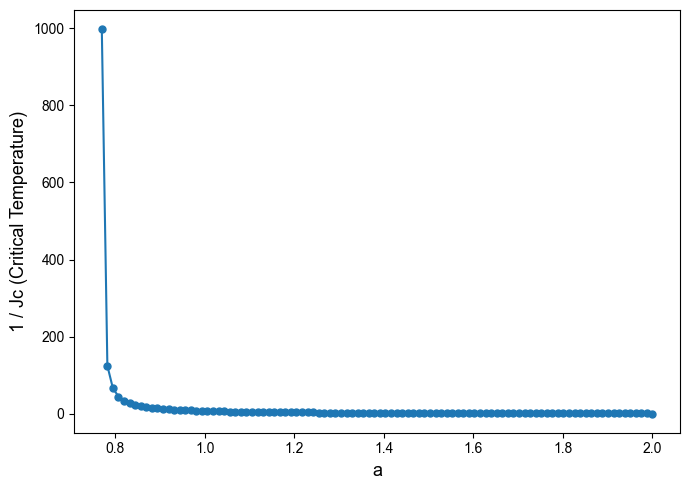

In [12]:
a_vals = np.linspace(.77, 2, 100)
Jc_vals = []
Tc_vals = []

for a in a_vals:
    Jc = find_Jc(
        a=a,
        Jlow=1e-3, Jhigh=1e2,
        max_steps=6, max_dist_final=6,
        tol=1e-5,
        growth_threshold=1e4, decay_threshold=1e-4
    )
    Jc_vals.append(Jc)
    Tc_vals.append(1.0 / Jc)
    print(f"a = {a:.4f}  →  Jc = {Jc:.3}, Tc = {1/Jc:.3}")

Jc_vals = np.array(Jc_vals)
Tc_vals = np.array(Tc_vals)

# ----- plot -----
plt.figure(figsize=(7,5))
plt.plot(a_vals, Tc_vals, 'o-', ms=5)
plt.xlabel("a", fontsize=13)
plt.ylabel("1 / Jc (Critical Temperature)", fontsize=13)
plt.grid(False)
plt.tight_layout()
plt.show()

# Fixed point

In [8]:
a = 1
tolerance = 1e-5

Jc = find_Jc(
    a=a,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=6, max_dist_final=5,
    tol=tolerance,
    growth_threshold=1e4, decay_threshold=1e-4
)
print("Critical J =", Jc)

J0 = build_initial_guess(Jc, a=a, D=200)

J_star, info = newton_rg_lstsq(J0, verbose=True)
print("Fixed point J*:\n", J_star)

Critical J = 0.12799049526453016
[lstsq] iter 0: D=200, D1=66, ||J'-J||=1.960e-02
[lstsq] iter 1: D=200, D1=66, ||J'-J||=1.367e-02
[lstsq] iter 2: D=200, D1=66, ||J'-J||=8.602e-03
[lstsq] iter 3: D=200, D1=66, ||J'-J||=5.268e-03
[lstsq] iter 4: D=200, D1=66, ||J'-J||=1.874e-03
[lstsq] iter 5: D=200, D1=66, ||J'-J||=3.904e-04
[lstsq] iter 6: D=200, D1=66, ||J'-J||=1.304e-04
[lstsq] iter 7: D=200, D1=66, ||J'-J||=5.472e-05
[lstsq] iter 8: D=200, D1=66, ||J'-J||=2.147e-05
[lstsq] iter 9: D=200, D1=66, ||J'-J||=7.297e-06
Fixed point J*:
 [0.         0.12242913 0.05533485 0.03232251 0.02482908 0.022188
 0.02103317 0.01699398 0.01350825 0.01072418 0.00987416 0.00938945
 0.0089723  0.00849432 0.00820056 0.00792457 0.00782142 0.00787141
 0.00788337 0.0072592  0.00662165 0.00606923 0.00566228 0.00525101
 0.00488706 0.00450457 0.00409968 0.0037425  0.00367203 0.00363021
 0.00357539 0.00350288 0.00344999 0.00338925 0.00333532 0.00329874
 0.00325412 0.00318257 0.00312    0.00305597 0.00302074 0.00

In [9]:
err = check_fixed_point(J_star, tol=tolerance)

Fixed-point error norm = 2.456e-06
✔ Fixed point verified.


# Thermal exponent yT

In [34]:
a = .98
N = 1000

Jc = find_Jc(
    a=a,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=6, max_dist_final=5,
    tol=1e-5, growth_threshold=1e4, decay_threshold=1e-4
)
J0 = build_initial_guess(Jc, a=a, D=N)
J_star, info = newton_rg_lstsq(J0, verbose=False)

T, J_head = recursion_matrix_at_fixed_point(J_star, N)
y_T, lambda_T, eigs = thermal_exponent_from_T(T, b=3.0)

print("Largest relevant eigenvalue λ_T:", lambda_T)
print("Thermal scaling exponent y_T:", y_T)
print("Correlation length exponent ν ≈ 1/y_T:", 1.0/y_T)

Largest relevant eigenvalue λ_T: (1.0442915858807107+0j)
Thermal scaling exponent y_T: 0.0394486278116333
Correlation length exponent ν ≈ 1/y_T: 25.34942418719828


In [30]:
eigvals = np.linalg.eigvals(T)
sorted(eigvals, key=lambda z: abs(z), reverse=True)

[np.complex128(0.9192612128050655+0j),
 np.complex128(0.2816243583784812+0.5832769306273999j),
 np.complex128(0.2816243583784812-0.5832769306273999j),
 np.complex128(-0.28685238540515234+0.4504715919158681j),
 np.complex128(-0.28685238540515234-0.4504715919158681j),
 np.complex128(-0.49241816019438156+0j),
 np.complex128(-0.07132686766022356+0j),
 np.complex128(-0.036776474800989715+0.05539590197778245j),
 np.complex128(-0.036776474800989715-0.05539590197778245j),
 np.complex128(0.030915640573921106+0.05300511017368809j),
 np.complex128(0.030915640573921106-0.05300511017368809j),
 np.complex128(0.05346509533244396+0j),
 np.complex128(-0.005125709040049381+0j),
 np.complex128(-5.0542586480917926e-05+4.7849369529639414e-05j),
 np.complex128(-5.0542586480917926e-05-4.7849369529639414e-05j),
 np.complex128(4.2659492944909175e-05+4.824793552894552e-05j),
 np.complex128(4.2659492944909175e-05-4.824793552894552e-05j),
 np.complex128(3.578586133550879e-05+1.973423753278621e-05j),
 np.complex12

## Stability of yT with N

In [ ]:
# ----- parameters -----
b = 3.0
N_min = 20
N_max = len(J_star) - 1    # maximum allowed head size

Ns = []
lambda_Ts = []
yTs = []

# ----- main sweep -----
for N in range(N_min, N_max + 1, 20):
    T, J_head = recursion_matrix_at_fixed_point(J_star, N)
    y_T, lambda_T, eigs = thermal_exponent_from_T(T, b)

    
    Ns.append(N)
    lambda_Ts.append(lambda_T.real)
    yTs.append(y_T.real)

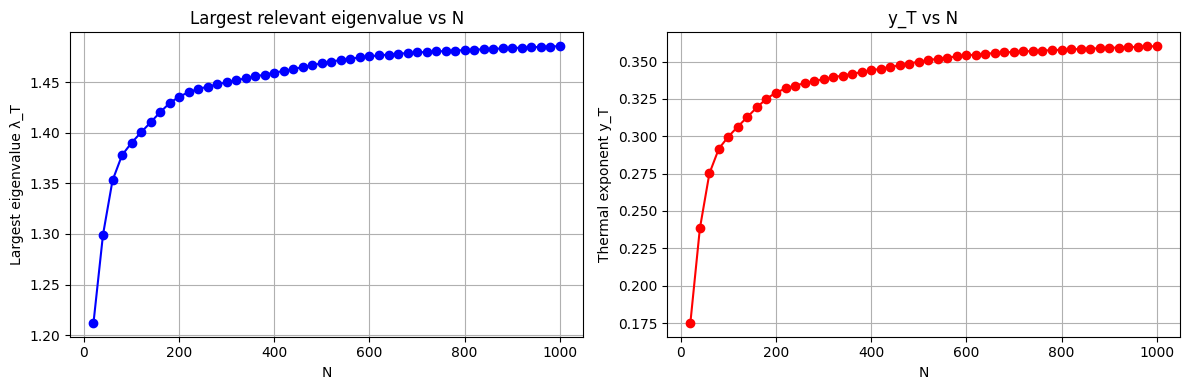

In [27]:
# ----- plots -----
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(Ns, lambda_Ts, 'b-o')
ax[0].set_xlabel("N")
ax[0].set_ylabel("Largest eigenvalue λ_T")
ax[0].set_title("Largest relevant eigenvalue vs N")
ax[0].grid()

ax[1].plot(Ns, yTs, 'r-o')
ax[1].set_xlabel("N")
ax[1].set_ylabel("Thermal exponent y_T")
ax[1].set_title("y_T vs N")
ax[1].grid()

plt.tight_layout()
plt.savefig("../figures/yT_stability.png")
plt.show()

# Magnetization

In [35]:
a = 1
tolerance = 1e-5

Jc = find_Jc(
    a=a,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=6, max_dist_final=5,
    tol=tolerance,
    growth_threshold=1e4, decay_threshold=1e-4
)
print("Critical J =", Jc)

J0 = build_initial_guess(Jc, a=a, D=200)
J_star, info = newton_rg_lstsq(J0, verbose=True)
print("Fixed point J*:\n", J_star)
err = check_fixed_point(J_star, tol=tolerance)
print()
yH, alphaH = magnetic_exponent_yH(J_star, eps=1e-8, b=3.0)
print("dH'/dH at fixed point =", alphaH)
print("y_H =", yH)

Critical J = 0.12799049526453016
[lstsq] iter 0: D=200, D1=66, ||J'-J||=1.960e-02
[lstsq] iter 1: D=200, D1=66, ||J'-J||=1.367e-02
[lstsq] iter 2: D=200, D1=66, ||J'-J||=8.602e-03
[lstsq] iter 3: D=200, D1=66, ||J'-J||=5.268e-03
[lstsq] iter 4: D=200, D1=66, ||J'-J||=1.874e-03
[lstsq] iter 5: D=200, D1=66, ||J'-J||=3.904e-04
[lstsq] iter 6: D=200, D1=66, ||J'-J||=1.304e-04
[lstsq] iter 7: D=200, D1=66, ||J'-J||=5.472e-05
[lstsq] iter 8: D=200, D1=66, ||J'-J||=2.147e-05
[lstsq] iter 9: D=200, D1=66, ||J'-J||=7.297e-06
Fixed point J*:
 [0.         0.12242913 0.05533485 0.03232251 0.02482908 0.022188
 0.02103317 0.01699398 0.01350825 0.01072418 0.00987416 0.00938945
 0.0089723  0.00849432 0.00820056 0.00792457 0.00782142 0.00787141
 0.00788337 0.0072592  0.00662165 0.00606923 0.00566228 0.00525101
 0.00488706 0.00450457 0.00409968 0.0037425  0.00367203 0.00363021
 0.00357539 0.00350288 0.00344999 0.00338925 0.00333532 0.00329874
 0.00325412 0.00318257 0.00312    0.00305597 0.00302074 0.00

In [36]:
J = Jc+.001
M = magnetization(J, a, Jc, max_dist_final=5, max_steps=10)
print("M =", M)

M = 0.004578677665505217


Jc = 0.4238417166098952


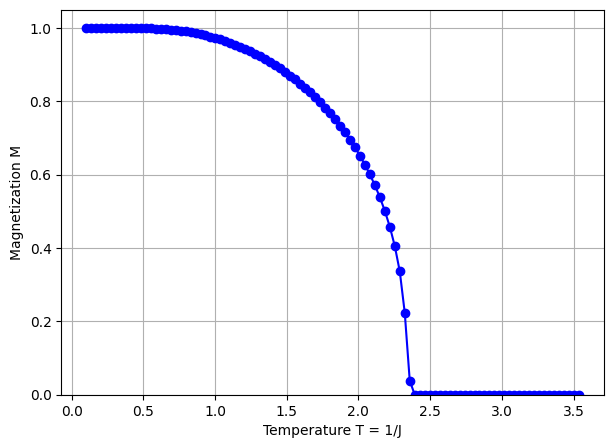

In [51]:
# Parameters
a = 1.5
Jc = find_Jc(
    a=a,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=8, max_dist_final=6,
    tol=1e-6, growth_threshold=1e4, decay_threshold=1e-4
)

print(f"Jc = {Jc}")
T_values = np.linspace(0.1, 1.5/Jc, 100)
J_values = 1.0 / T_values

M_values = [magnetization(J0, a, Jc,
                          max_dist_final=6,
                          max_steps=12,
                          eps=1e-8) for J0 in J_values]

plt.figure(figsize=(7, 5))
plt.plot(T_values, M_values, 'b-o')
plt.xlabel("Temperature T = 1/J")
plt.ylabel("Magnetization M")
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()

Processing a = 0.8
Processing a = 0.97
Processing a = 1.1400000000000001
Processing a = 1.31
Processing a = 1.48
Processing a = 1.65
Processing a = 1.82
Processing a = 1.99


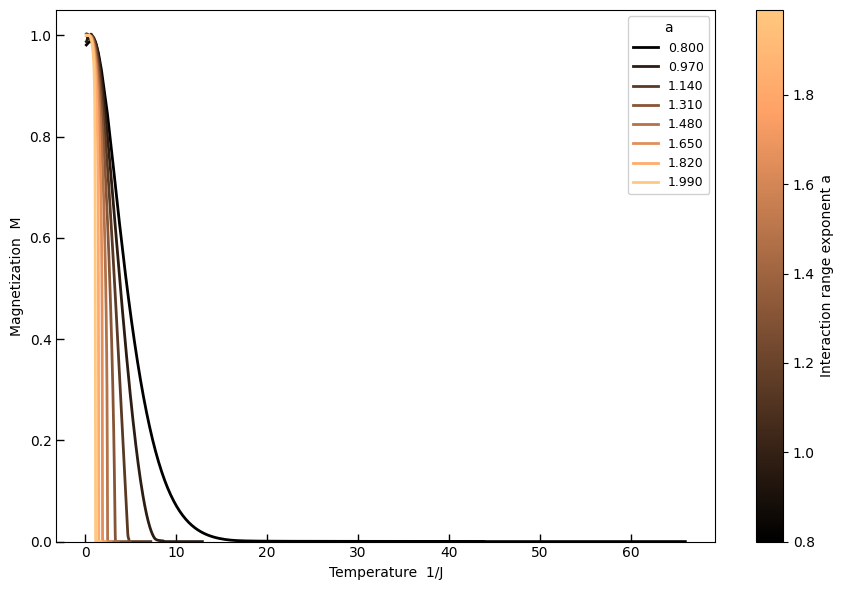

In [61]:
from matplotlib import cm

a_values = np.linspace(0.8, 1.99, 8)
data_by_a = []

for a in a_values:
    print(f"Processing a = {a}")

    Jc = find_Jc(
        a=a,
        Jlow=1e-2, Jhigh=1e2,
        max_steps=8,
        max_dist_final=6,
        tol=1e-6,
        growth_threshold=1e4,
        decay_threshold=1e-4
    )

    T_arr = np.linspace(0.10, 1.5 / Jc, 200)
    J_arr = 1.0 / T_arr

    M_arr = np.array([
        magnetization(J0, a, Jc,
                      max_dist_final=6,
                      max_steps=12,
                      eps=1e-8)
        for J0 in J_arr
    ])

    data_by_a.append(list(zip(T_arr, M_arr)))

# Plot
fig, ax = plt.subplots(figsize=(9, 6))
cmap = cm.copper
norm = plt.Normalize(a_values.min(), a_values.max())

for a, tuples_a in zip(a_values, data_by_a):
    T_arr = np.array([x[0] for x in tuples_a])
    M_arr = np.array([x[1] for x in tuples_a])
    ax.plot(T_arr, M_arr, label=f"{a:.3f}", color=cmap(norm(a)), linewidth=2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, label='Interaction range exponent a')
ax.set_xlabel('Temperature  1/J')
ax.set_ylabel('Magnetization  M')
#ax.set_xlim(0, 3)
ax.set_ylim(0, 1.05)
ax.legend(title='a', loc='upper right', fontsize=9, framealpha=.9)
ax.tick_params(axis='both', which='major', direction='in', width=1, length=6)
plt.tight_layout()
plt.show()

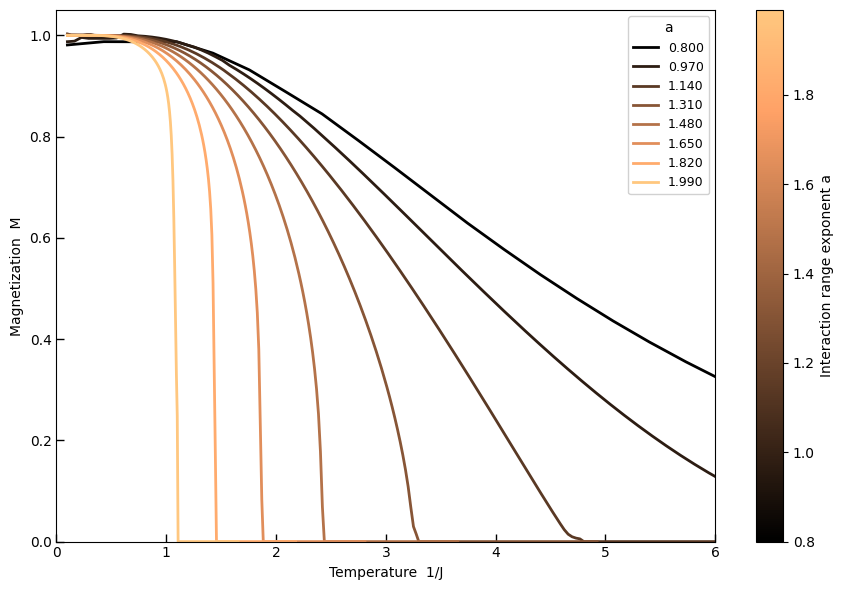

In [62]:
# Plot
fig, ax = plt.subplots(figsize=(9, 6))
cmap = cm.copper
norm = plt.Normalize(a_values.min(), a_values.max())

for a, tuples_a in zip(a_values, data_by_a):
    T_arr = np.array([x[0] for x in tuples_a])
    M_arr = np.array([x[1] for x in tuples_a])
    ax.plot(T_arr, M_arr, label=f"{a:.3f}", color=cmap(norm(a)), linewidth=2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, label='Interaction range exponent a')
ax.set_xlabel('Temperature  1/J')
ax.set_ylabel('Magnetization  M')
ax.set_xlim(0, 6)
ax.set_ylim(0, 1.05)
ax.legend(title='a', loc='upper right', fontsize=9, framealpha=.9)
ax.tick_params(axis='both', which='major', direction='in', width=1, length=6)
plt.tight_layout()
plt.show()

# Critical exponents

In [7]:
result = compute_exponents_over_a(
    a_min=1, a_max=2.0,
    num_points=10,
    D_init=300, N_matrix=300,
    d_dim=1.0, b=3.0
)

a = result["a"]
exps = [
    ("yT",     result["yT"]),
    ("yH",     result["yH"]),
    ("β",      result["beta"]),
    ("δ",      result["delta"]),
    ("η",      result["eta"]),
    ("ν",      result["nu"]),
    ("α",      result["alpha"]),
    ("γ",      result["gamma"]),
]


=== Computing exponents at a = 1.0000 ===
  yT = 0.012026417701829155
  yH = 0.5011500539195503
  ν=83.1503, β=41.4795, δ=1.0046, η=1.9977, α=-81.1503, γ=0.1913

=== Computing exponents at a = 1.1111 ===
  yT = 0.12947720591621606
  yH = 0.56009229680233
  ν=7.7234, β=3.3976, δ=1.2732, η=1.8798, α=-5.7234, γ=0.9282

=== Computing exponents at a = 1.2222 ===
  yT = 0.21598853873113094
  yH = 0.6162363554132185
  ν=4.6299, β=1.7768, δ=1.6058, η=1.7675, α=-2.6299, γ=1.0763

=== Computing exponents at a = 1.3333 ===
  yT = 0.28183015220298435
  yH = 0.6694767775484318
  ν=3.5482, β=1.1728, δ=2.0255, η=1.6610, α=-1.5482, γ=1.2027

=== Computing exponents at a = 1.4444 ===
  yT = 0.3312390920538422
  yH = 0.719677879716543
  ν=3.0190, β=0.8463, δ=2.5673, η=1.5606, α=-1.0190, γ=1.3264

=== Computing exponents at a = 1.5556 ===
  yT = 0.3661678425440614
  yH = 0.7666789749547216
  ν=2.7310, β=0.6372, δ=3.2859, η=1.4666, α=-0.7310, γ=1.4566

=== Computing exponents at a = 1.6667 ===
  yT = 0.3

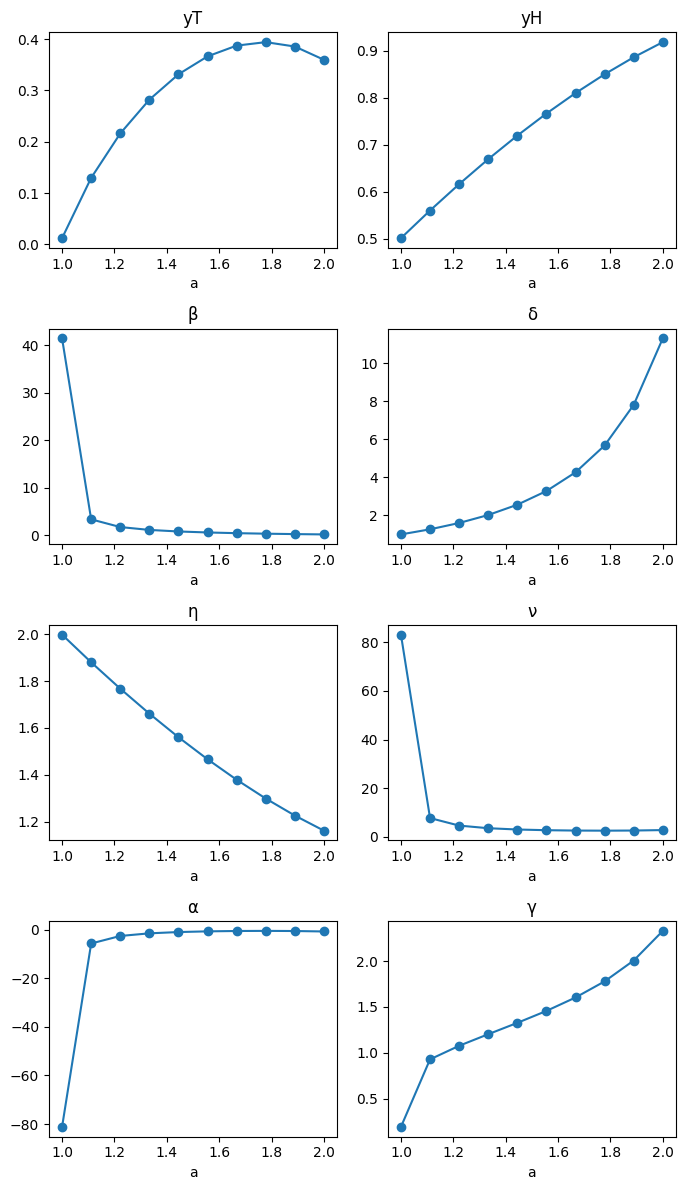

In [8]:
fig, axes = plt.subplots(4, 2, figsize=(7, 12))
axes = axes.flatten()

for i, (name, vals) in enumerate(exps):
    ax = axes[i]
    ax.plot(a, vals, marker="o")
    ax.set_title(name)
    ax.set_xlabel("a")
    ax.grid(False)
plt.tight_layout()
#plt.savefig("../figures/exponents_new.png")
plt.show()